## Week 1 - Understanding PCA, GMM, KNN, and Bias-Variance Trade-Off

## Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is one of the simplest approaches to dimensionality reduction. PCA uses a linear transformation to uncorrelate data while still maintaining the dimensionality of the original data.

Essentially, PCA will remove features that are unimportant and will find an underlying linear manifold that the data is embedded in.

PCA finds the directions of maximum variance in high-dimensional data and projects it onto a new subspace with equal or fewer dimensions thaan the original

There are two approaches on PCA that yield the same result albeit with different processes.
   
   1. Maximum Variance Formulation
   2. Minimum-error Formulation

## 1. Maximum Varaince Formulation

Consider the data $X$ comprised on $N$ data samples in a D-dimensional space, so $X$ is a matrix of size $D\times N$.

The **first step** in PCA is to centralize or demean $X$. This will is to guarantee that all features will have the same impact and not weight more only because their range of values is much larger (example, age vs income).

* Without loss of generality, let's assume that we subtracted the mean to the input data, $X$. Now, $X$ has zero mean.

The **second step** is to find the linear transformation $A$ that transforms $X$ to a space where features are:
1. **Uncorrelated (preserve all dimensions)**
2. **reduced (dimensionality reduction)**

\begin{align*}Y = AX\end{align*}

where $A$ is a $D\times D$ matrix, $X$ is a $D\times N$ data matrix and therefore $Y$ is also a $D\times N$ transformed data matrix.

The variance of the transformed data $Y$ is given by:

\begin{align*}
R_y &= E[YY^T] \\
&= E[AX(AX)^T] \\
&= E[AXX^TA^T] \\
&= AE[XX^T]A^T \\
&= AR_xA^T
\end{align*}

Note that we are computing the variance along the dimensions of $Y$, therefore, $R_y$ is a $D\times D$ matrix. Similarly, $R_X$ represents the covariance of the data $X$. Covariances matrices are symmetric therefore $R_X=R_X^T$ and $R_Y=R_Y^T$.

Similarly, $R_X$ represents the covariance of the data $X$. 

If we write $A$ in terms of vector elements:

\begin{align*}A = \left[\begin{array}{cc}
a_{11} & a_{12}\\
a_{21} & a_{22}
\end{array}\right]=\left[\begin{array}{c}
\overrightarrow{a_{1}}\\
\overrightarrow{a_{2}}
\end{array}\right]\end{align*}

Then,

\begin{align*}
R_y &= \left[\begin{array}{c}a_{1}\\a_{2}\end{array}\right] R_X \left[\begin{array}{cc}a_{1} & a_{2}\end{array}\right] \\
&= \left[\begin{array}{cc} a_1 R_X a_1^T & a_1 R_X a_2^T\\ a_2 R_X a_1^T & a_2 R_X a_2^T\end{array}\right]
\end{align*}

* If we want to represent the data in a space in which the features are **uncorrelated**, what shape does the covariance matrix have to take?

Diagonal! Why?

* Can we use the eigenvectors of $R_X$ as our linear transformation $A$?

Consider the case where we are trying to project the data $X$ into a 1-dimensional space, so we are trying to find the direction $a_1$ where maximal data variance is preserved:

\begin{align*}
\arg_{a_1} \max a_1 R_X a_1^T\end{align*}

We want this solution to be bounded (considering $a_1 = \infty$ would maximize), so we need to constraint the vector to have norm 1

\begin{align*}\Vert a_1\Vert_2^2 = 1 \iff a_1 a_1^T = 1\end{align*}

Then, we using Lagrange Optimization:

\begin{align*}\mathcal{L} = a_1 R_X a_1^T + \lambda_1 (1-a_1 a_1^T)\end{align*}

Solving for $a_1$:

\begin{align*}
\frac{\partial \mathcal{L}}{\partial a_1} &= 0 \\
R_X a_1^T + R_X^T a_1^T - 2\lambda_1 a_1^T &= 0 \\
R_X a_1^T = \lambda a_1^T
\end{align*}

* Does this look familiar?

This is stating that $a_1^T$ must be an eigenvector of $R_X$!

So coming back to the question "Can we use the eigenvectors of $X$ as our linear transformation $A$?" YES!

* If we left multiply by $a_1$ and make use of $a_1a_1^T = 1$:

\begin{align*}a_1 R_X a_1^T = \lambda_1\end{align*}

**So the variance will be maximum when we set the project direction $a_1$ equal to the eigenvector having the largest eigenvalue $\lambda_1$**.

* This eigenvector is known as the first **principal component**.

* As you may anticipate, the linear trasnformation $A$ will the be a matrix whose row entries are **sorted** the eigenvectors (sorted by their correspondent eigenvalue).

\begin{align*}A &= \left[\begin{array}{c}
\overrightarrow{a_{1}}\\
\overrightarrow{a_{2}}
\end{array}\right]\end{align*}

where $a_1$ and $a_2$ are eigenvectors of $R_X$ with correspondent eigenvalues $\lambda_1$ and $\lambda_2$ with $\lambda_1>\lambda_2$.

## 2. PCA as Minimum-error Formulation

We can also look at PCA as a minimization of mean squared error.

Consider $X$ and a D-dimensional orthogonal basis $\mathbf{u}$:

\begin{align*}\hat{x} = \sum_{i=1}^m y_i a_i\end{align*}

where $m<D$.

\begin{align*}y_j = x^Ta_j \end{align*}

where $A^TA = I$.

We want to minimize the residual error:

\begin{align*}\epsilon = x - \hat{x} = \sum_{i=m+1}^D y_i a_i\end{align*}

* The objective function we will use is the mean square residual:

\begin{align*}
J &= E\left[ \|\epsilon\|^2_2\right]\\
&= E\left[\left( \sum_{i=m+1}^D y_ia_i\right)\left( \sum_{i=m+1}^D y_i a_i\right) \right]\\
&=\sum_{j=m+1}^D E [y_j^2]\\
&=\sum_{j=m+1}^D E [(a_j^T\mathbf{x})(\mathbf{x}^Ta_j)]\\
&= \sum_{j=m+1}^D a_j^T E[\mathbf{x}\mathbf{x}^T]a_j\\
&= \sum_{j=m+1}^D a_j^T R_x a_j
\end{align*}

Minimize the error and incorporate Lagrange parameters for $U^TU=I$:

\begin{align*}
\frac{\partial J}{\partial a_j} &= 2(R_x a_j - \lambda_j a_j) = 0\\
R_x a_j &= \lambda_j a_j
\end{align*}

So, the sum of the error is the sum of the eigenvalues of the unused eigenvectors.  So, we want to select the eigenvectors with the $m$ largest eigenvalues. 

## Implementation and Application of PCA

PCA can be used to perform dimensionality reduction to simplify a dataset before applying it to a machine learning model. By doing this, this decreases the complexity of the dataset and can improve performance of the algorithm chosen.

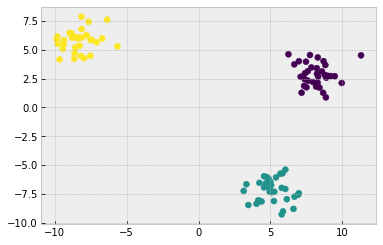

In [16]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

from sklearn.datasets import make_blobs

def PCA(X, m, display=1):
    '''This function implements PCA. The data matrix X is DxN matrix, 
    where D is the dimension and N the number of points'''
    
    D, N = X.shape
    
    # Demean the Data
    data = X - X.mean(axis=1).reshape(-1, 1)
    
    # Covariance of the input data X
    cov_mat = np.cov(data)
    
    # Find eigenvectors and eigenvalues 
    eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
    
    # Sort eigenvectors by magnitude of eigenvalues
    eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
    eigen_pairs = sorted(eigen_pairs, key=lambda x: x[0], reverse=True)

    # Linear transformation
    A = np.hstack(([eigen_pairs[i][1][:, np.newaxis] for i in range(m)]))
    
    #compute explained variance and plot
    cum_var_exp=0
    if display:
        total = sum(eigen_vals)
        var_explained = [(i/total) for i in sorted(eigen_vals, reverse=True)]
        cum_var_exp = np.cumsum(var_explained)
        plt.bar(range(1,D+1), var_explained, alpha=0.5, align='center', label='individual explained variance')
        plt.step(range(1,D+1), cum_var_exp, alpha=0.5, where='mid', label='cumulative explained variance')
        plt.ylabel('Explained variance ratio')
        plt.xlabel('Principal components')
        plt.legend(loc='best')
        plt.show();
    return A, eigen_pairs, cum_var_exp

X, y = make_blobs(n_samples = 100, n_features = 2, random_state = 77)

plt.scatter(X[:,0], X[:,1], c=y);

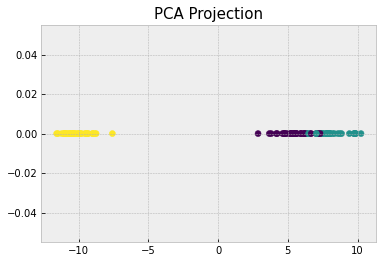

In [15]:
A,_,_ = PCA(X.T,1,0)

projection_PCA = X@A #or (A.T@X.T).T

plt.scatter(projection_PCA, np.zeros(len(projection_PCA)), c=y)
plt.title('PCA Projection', fontsize=15);

## Gaussian Mixture Models (GMM)

GMM is a probabilistic model that assumes a data likelihood to be the weighted sum of Gaussian distributions with unknown parameters.

$$p(\mathbf{x}|\Theta) = \sum_{k=1}^K \pi_k N(\mathbf{x}|\mathbf{\mu}_k,\Sigma_k)$$

where $\Theta=\{\pi_k, \mu_k, \Sigma_k\}_{k=1}^K$, $0 \leq \pi_k \leq 1$ and $\sum_{k=1}^K \pi_k = 1$.

* When standard distributions (such as Gamma, Exponential, Gaussian, etc.) are not sufficient to characterize a *complicated* data likelihood, we can instead characterize it as the sum of weighted Gaussians distributions

* Another way that GMMs are most commonly used for is to partition data in subgroups

* GMMs can be used to learn a complex distribution that represent a dataset. Thus, it can be used within the probabilistic generative classifier framework to model complex data likelihoods.

* GMMs are also commonly used for **clustering**. Here a GMM is fit to a dataset with the goal of partitioning it into clusters.

**<font color=blue>Step 1</font>**

Describe the **observed data likelihood**, $\mathcal{L}^o$. As seen last class:

$$\mathcal{L}^0 = \prod_{i=1}^N \sum_{k=1}^K \pi_k \mathcal{N}(x_i|\mu_k, \Sigma_k)$$

**<font color=blue>Step 2</font>**

Describe the log-likelihood function:

\begin{align}
\mathcal{L} &= \ln\left(\prod_{i=1}^N \sum_{k=1}^K \pi_k \mathcal{N}(x_i|\mu_k, \Sigma_k)\right)\\
\iff \mathcal{L} &= \sum_{i=1}^N \ln \left( \sum_{k=1}^K \pi_k \mathcal{N}(x_i|\mu_k, \Sigma_k) \right)
\end{align}

**<font color=blue>Step 3</font>**

Optimize for the parameters $\Theta=\{\pi_k, \mu_k,\Sigma_k\}_{k=1}^K$

$$\frac{\partial \mathcal{L}}{\partial \mu_k} = 0, \frac{\partial \mathcal{L}}{\partial \Sigma_k} = 0, \text{ and }, \frac{\partial \mathcal{L}}{\partial \pi_k} = 0$$

but this is a difficult problem to maximize!

* A common approach for estimating the parameters of a GMM given a data set is by using the **Expectation-Maximization (EM) algorithm**.

## Expectation-Maximixation (EM) 

The **Expectation-Maximization** or **EM** algorithm is used to find the Maximum Likelihood Estimators (MLE) (or MAP estimators) for model parameters when data is incomplete, has missing data points, or has unobserved (hidden) latent variables (such as the case of censored data). 

* For all of these cases, the MLE optimization is very difficult to obtain by simply taking the derivative and solve for the parameters.

**<font color=orange>Step 1</font>**
The first step of EM is to characterized the observed likelihood $\mathcal{L}^0$.

**<font color=orange>Step 2</font>**
Introduce *hidden latent variables* (also referred to as *hidden variables*) that simplify the observed data likelihood, $\mathcal{L}$.

**<font color=orange>Step 3</font>**
Use the hidden variables to define the *complete likelihood* $\mathcal{L}^c$.

With this, we build the EM optimization function:

$$\arg_{z,\Theta} \max Q(\Theta,\Theta^t)$$

where 

$$Q(\Theta,\Theta^t) = E[\ln(\mathcal{L^c})|X,\Theta^t]$$

$E[\bullet]$ denotes expected value and $t$ denotes *iteration*. At $t=0$, we start with random values for the parameters $\Theta$.

Once we have this, the EM algorithm will alternate between E-step and M-step:

1. **<font color=blue>E-step</font> (Expectation step)** Estimate the hidden variables. While holding $\Theta$ fixed, find the variables $z$ that maximize $E[\ln(\mathcal{L^c})]$.

2. **<font color=blue>M-step</font> (Maximization step)** Estimate the parameters of the complete data likelihood $\mathcal{L}^c$. While holding the newly found variables $z$, find the best values for the parameters $\Theta$ that maximize $E[\ln(\mathcal{L^c})]$.

and it keeps iterating between E-step and M-step until convergence or until a certain number of iterations is reached.

We can now extent the optimization function:

\begin{align}
Q(\Theta,\Theta^t) &= E[\ln(\mathcal{L^c})|X,\Theta^t] \\
&= \sum_{\mathbf{z}} \ln(\mathcal{L^c}) P(z|X,\Theta^t) \\
&= \sum_{z_i=1}^K \ln(\mathcal{L^c}) P(\mathbf{z}_i|\mathbf{x}_i,\Theta^t)
\end{align}

**<font color=blue>E-step</font>**

In order to complete the E-STEP, we need to know how to compute $P(\mathbf{z}_i|\mathbf{x}_i,\Theta^t)$. 

* This is the posterior probability of the label $z_i$ for data sample $x_i$.

* So we want to assign the label $z_i$ to the data sample $x_i$ for which the posterior probability is maximized (just like in Naive Bayes classification).

Recall from **Bayes' Rule**: for two non-empty events $A$ and $B$, $P(A|B) = \frac{P(B|A)P(A)}{P(B)}$. We can use this theorem to rewrite $P(\mathbf{z}_i|\mathbf{x}_i,\Theta^t)$:

\begin{align}
P(\mathbf{z}_i|\mathbf{x}_i,\Theta^t) &= \frac{P(\mathbf{x}_i|\mathbf{z}_i,\Theta^t)P(\mathbf{z}_i|\Theta^t)}{P(\mathbf{x}_i|\Theta^t)} \\
&= \frac{P(\mathbf{x}_i|\mathbf{\mu}_{z_i}^t, \Sigma_{z_i}^t) \pi_{z_i}^t}{\sum_{z_i=1}^K \pi_{z_i}^t P(\mathbf{x}_i|\mathbf{\mu}_{z_i}^t, \Sigma_{z_i}^t)} \\
&= C_{ik}
\end{align}

This is called the **memberships** or **responsabilities** matrix, which contains the label assignment for point $x_i$ in each Gaussian component $k.

* In the E-STEP we estimate the membership matrix $C_{ik} = P(\mathbf{z}_i|\mathbf{x}_i,\Theta^t)$. This matrix is of size $N\times K$ that contains the likelihoods of each point belonging in each one of the Gaussians.

* A good check when implementing this matrix is to make sure that the sum of the rows are equal to 1!

**This completes the Expectation step (E-step) in EM**. Now, we derive the update equations for the parameters $\Theta=\{\pi_k,\mu_k,\Sigma_k\}_{k=1}^K$  in the Maximization step.

**<font color=blue>M-step</font>**

In the **M-step**, we are going to use (and hold constant) the membership matrix $C_{ik}$ we learned from the E-step.

We will know estimate the new set of parameters $\Theta=\{\pi_k,\mu_k,\Sigma_k\}_{k=1}^K$ that maximize $Q(\Theta,\Theta^t)$, i.e.

$$\arg_{\mathbf{\Theta}}\max Q(\Theta,\Theta^t)$$

Without loss of generality, let's assume that the covariance matrices are isotropic: $\Sigma_k = \sigma_k^2\mathbf{I}$, then we can rewrite it as:

\begin{align}
Q(\Theta, \Theta^t) &= \sum_{z_i=1}^K \ln(\mathcal{L^c}) P(\mathbf{z}_i|\mathbf{x}_i,\Theta^t)\\
&= \sum_{z_i=1}^K \ln\left(\prod_{i=1}^N \pi_{z_i}\mathcal{N}(x_i|\mathbf{\mu}_{z_i},\Sigma_{z_i})\right) P(\mathbf{z}_i|\mathbf{x}_i,\Theta^t) \\
&= \sum_{k=1}^K \ln\left(\prod_{i=1}^N \pi_k\mathcal{N}(x_i|\mathbf{\mu}_k,\Sigma_k)\right) P(\mathbf{z}_i =k|\mathbf{x}_i,\Theta^t) \\
&= \sum_{k=1}^K \sum_{i=1}^N \left(\ln(\pi_k) + \ln\left(\mathcal{N}(x_i|\mathbf{\mu}_k,\Sigma_k)\right) \right) C_{ik}\\
&= \sum_{k=1}^K \sum_{i=1}^N \left( \ln(\pi_k) -\frac{1}{2}\ln(2\pi) -\frac{1}{2}\ln(\sigma_k^2) - \frac{1}{2\sigma^2_k}\Vert \mathbf{x}_i -\mu_k\Vert_2^2 \right) C_{ik}
\end{align}

So, now we want to solve:

\begin{align}
\frac{\partial Q(\Theta,\Theta^t)}{\partial \mu_k} &= 0 \\
\frac{\partial Q(\Theta,\Theta^t)}{\partial \sigma_k^2} &= 0 \\
\frac{\partial Q(\Theta,\Theta^t)}{\partial \pi_k} &= 0 
\end{align}

### Solving for $\mu_k$

\begin{align}
0 &= \frac{\partial Q(\Theta,\Theta^t)}{\partial \mu_k} \\
0 &= \sum_{i=1}^N \left(\frac{1}{\sigma^2_k}(\mathbf{x}_i -\mu_k)\right) C_{ik}\\
0 &= \sum_{i=1}^N (\mathbf{x}_i -\mu_k) C_{ik} \\
0 &= \sum_{i=1}^N \mathbf{x}_i C_{ik} - \sum_{i=1}^N \mu_k C_{ik} \\
\sum_{i=1}^N \mathbf{x}_i C_{ik} &= \mu_k \sum_{i=1}^N C_{ik} \\
\mu_k &= \frac{\sum_{i=1}^N \mathbf{x}_i C_{ik}}{\sum_{i=1}^N C_{ik}}
\end{align}


* We can interpret this as a **weighted mean**, where the weights represent the likelihood of each point belonging to cluster $k$.

### Solving for $\sigma_k^2$

\begin{align}
0 &= \frac{\partial Q(\Theta,\Theta^t)}{\partial \sigma_k^2} \\
0 &= \sum_{i=1}^N \left( -\frac{1}{2\sigma_k^2} + \frac{2}{(2\sigma_k^2)^2} \Vert x_i-\mu_k\Vert_2^2 \right) C_{ik}\\
\frac{1}{2\sigma_k^2}\sum_{i=1}^N C_{ik} &= \frac{2}{(2\sigma_k^2)^2} \sum_{i=1}^N C_{ik} \Vert x_i-\mu_k\Vert_2^2 \\
\sigma_k\sum_{i=1}^N C_{ik} &= \sum_{i=1}^N C_{ik} \Vert x_i-\mu_k\Vert_2^2 \\
\sigma_k &= \frac{\sum_{i=1}^N C_{ik} \Vert x_i-\mu_k\Vert_2^2}{\sum_{i=1}^N C_{ik}}
\end{align}

* Again, assuming that the covariance of each cluster is isotropic, that is, $\Sigma_k = \sigma_k^2\mathbf{I}$.

* For the variance, this can be interpreted as how much each data point contributes to the k-th cluster.

### Solving for $\pi_k$

For $\pi_k$ we have the contraint that $\sum_{k=1}^K \pi_k =1$. Then we need to incorporate it into $Q(\Theta, \Theta^t)$ using Lagrange Multipliers.

$$Q_{\pi}(\Theta,\Theta^t) = Q(\Theta,\Theta^t) - \lambda \left(\sum_{k=1}^K\pi_k - 1\right)$$

where $\lambda$ is called the Lagrange multiplier.

\begin{align}
0 &= \frac{\partial Q_{\pi}(\Theta,\Theta^t)}{\partial \pi_k} \\
0 &= \sum_{i=1}^N C_{ik} \frac{1}{\pi_k} - \lambda \\
\pi_k &= \frac{\sum_{i=1}^N C_{ik}}{\lambda}
\end{align}

Since $\sum_k \pi_k = 1$, then:

\begin{align}
\sum_{k=1}^K \pi_k &= 1\\
\sum_{k=1}^K \frac{\sum_{i=1}^N C_{ik}}{\lambda} &= 1 \\
\lambda &= \sum_{i=1}^N \sum_{k=1}^K C_{ik}
\end{align}

So:

\begin{align}
\pi_k &= \frac{\sum_{i=1}^N C_{ik}}{\lambda} \\
\pi_k &= \frac{\sum_{i=1}^N C_{ik}}{\sum_{i=1}^N \sum_{k=1}^K C_{ik}} \\
&= \frac{\sum_{i=1}^N C_{ik}}{\sum_{i=1}^N 1}\text{, because }C_{ik} = \sum_{k=1}^K P(z_i = k|x_i,\Theta^t)\text{ is a (discrete) distribution}\\
&= \frac{\sum_{i=1}^N C_{ik}}{N}
\end{align}

* The $\pi_k$'s are summing up all its responsabilites over all data points.

## Implementation and Application of GMM

2: 0.6374736899603918
3: 0.3040618348925227
4: 0.6866417129047514
5: 0.38205198565659665
6: 0.5895686001239251
7: 0.5603341854507405
8: 0.409337851387504
Best mixture number is: 4


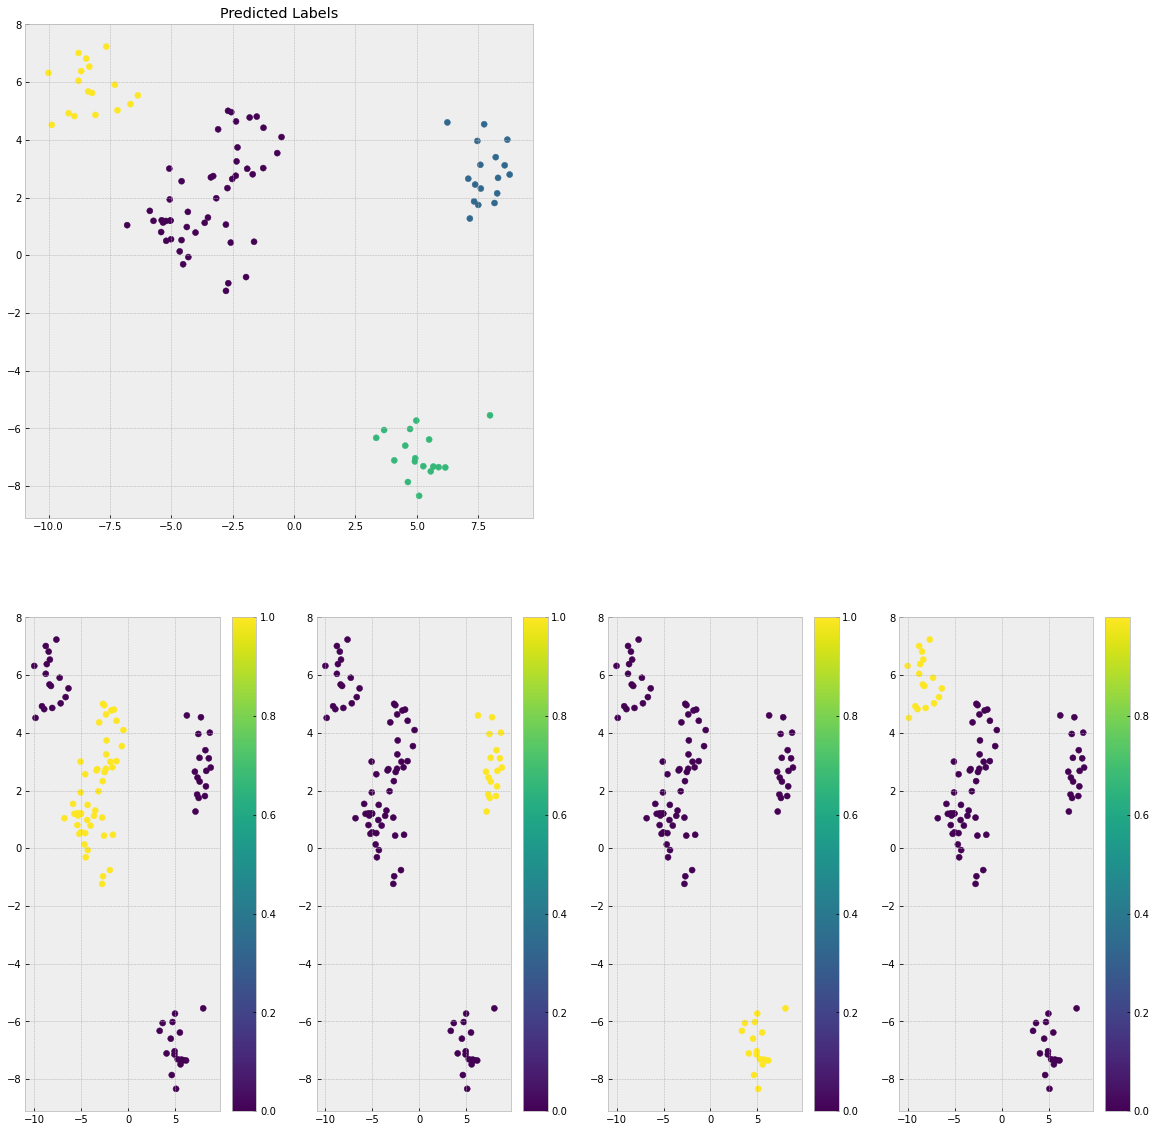

In [50]:
from scipy.stats import multivariate_normal

def EM_GaussianMixture(X, NumComponents, MaximumNumberOfIterations=100, DiffThresh=1e-4):
    '''This function implements the EM algorithm for a Gaussian Mixture Model'''
    
    # Size of the input data: N number of points, D features
    N, D = X.shape
    
    # Initialize Parameters of each Component K
    Means = np.zeros((NumComponents,D))
    Sigs = np.zeros(((D, D, NumComponents)))
    Ps = np.zeros(NumComponents)
    for i in range(NumComponents):
        rVal = np.random.uniform(0,1)
        Means[i,:] = X[max(1,round(N*rVal)),:]
        Sigs[:,:,i] = 1*np.eye(D)
        Ps[i] = 1/NumComponents
        
    # E-Step Solve for p(z | x, Theta(t)) = Cik
    pZ_X = np.zeros((N,NumComponents))
    for k in range(NumComponents):
        # Assign each point to a (multivariate) Gaussian component with probability pi(k)
        pZ_X[:,k] = Ps[k] * multivariate_normal.pdf(X,mean=Means[k],cov=Sigs[:,:,k], allow_singular=True)
    pZ_X = pZ_X/np.sum(pZ_X, axis=1, keepdims=True)
    Diff = np.inf
    NumberIterations = 1
    while Diff > DiffThresh and NumberIterations < MaximumNumberOfIterations:
        ## M-step: Update Means, Sigs, Ps
        MeansOld = Means.copy()
        SigsOld = Sigs.copy()
        PsOld = Ps.copy()
        for k in range(NumComponents):
            ## Complete M-step: Update parameters
            #Means
            Means[k,:] = sum((np.multiply( np.reshape(pZ_X[:, k], (pZ_X.shape[0], 1)),  X))) / sum(pZ_X[:,k])
            
            #Sigs
            xDiff = X-MeansOld[k,:]            
            J = np.zeros((D,D))
            for i in range(N):
                J = J + pZ_X[i,k]*np.outer(xDiff[i,:], xDiff[i,:])
            Sigs[:,:,k] = J / sum(pZ_X[:,k])
            
            #Ps
            Ps[k] = sum(pZ_X[:,k])/N
            
        ## E-step: Solve for p(z | x, Theta(t))
        # Complete E-step
        for k in range(NumComponents):
            # Assign each point to a Gaussian component with probability pi(k)
            pZ_X[:,k] = Ps[k] * multivariate_normal.pdf(X,mean=Means[k],cov=Sigs[:,:,k], allow_singular=True)
        pZ_X = pZ_X/np.sum(pZ_X, axis=1, keepdims=True)
        Diff = sum(sum(abs(MeansOld - Means))) + sum(sum(sum(abs(SigsOld - Sigs)))) + sum(abs(PsOld - Ps))
        #print('t = ',NumberIterations,': \t', Diff)
        NumberIterations = NumberIterations + 1
    return Means, Sigs, Ps, pZ_X

from sklearn import metrics


X, y = make_blobs(n_samples = 100, centers=6, random_state = 77)

bestSilo = -1
bestNCluster = 0
Nclusters = 2

bMean = []
bSigs = []
bPs = []
bpZ_X = []
bLabels = []
for I in range(7):
    

    Means, Sigs, Ps, pZ_X = EM_GaussianMixture(X, Nclusters, MaximumNumberOfIterations=100, DiffThresh=0.01)
    pZ_X

    num_points, feat = pZ_X.shape
    labels = []
    for n in range(num_points):
        maxx = 0
        index = 0
        for f in range(feat):
            if pZ_X[n][f] > maxx:
                maxx = pZ_X[n][f]
                index = f
        labels.append(index)

    y = metrics.silhouette_score(X, labels)
    print(str(Nclusters) + ': '+ str(y))
    if y > bestSilo:
        bestSilo = y
        bestNCluster = Nclusters
        bMean, bSigs, bPs, bpZ_X = Means, Sigs, Ps, pZ_X
        bLabels = labels
    Nclusters = Nclusters + 1
    
fig = plt.figure(figsize=(20,20))
fig.add_subplot(2,2,1)
plt.scatter(X[:,0],X[:,1], c=bLabels)
plt.title('Predicted Labels');

for i in range(bestNCluster):
    ax = fig.add_subplot(2,bestNCluster,bestNCluster+i+1)
    p1 = ax.scatter(X[:,0], X[:,1], c=bpZ_X[:,i])
    fig.colorbar(p1, ax=ax)
    
print("Best mixture number is:", bestNCluster)

## K-Nearest Neighbors Classifier

Nearest neighbors methods compare a test point to the $k$ nearest training data points and then estimate an output value based on the desired/true output values of the $k$ nearest training points.

* Essentially, there is no "training" other than storing the training data points and their desired outputs

* In test, you need to: 
    1. Determine which $k$ neighbors in the training data are closest to the test point; and,
    2. Determine the output value for the test point.
    
In order to find the $k$ *nearest-neighbors* in the training data, you need to define a **similarity measure** or a **dissimilarity measure**. The most common dissimilarity measure is Euclidean distrance:

* Euclidean distance: $d_E(\mathbf{x}_1, \mathbf{x}_2) = \sqrt{(\mathbf{x}_1 - \mathbf{x}_2)^T(\mathbf{x}_1 - \mathbf{x}_2)}$

* City-block distance: $d_{CB}(\mathbf{x}_1,\mathbf{x}_2) = \sum_{i=1}^n |\mathbf{x}_{1i} - \mathbf{x}_{2i}|$

* Mahalanobis distance: $d_M(\mathbf{x}_1, \mathbf{x}_2) = \sqrt{(\mathbf{x}_1 - \mathbf{x}_2)^T\Sigma^{-1}(\mathbf{x}_1 - \mathbf{x}_2)}$

* Cosine angle similarity: $\cos(\theta) = \frac{\mathbf{x}_1^T \mathbf{x}_2}{\Vert\mathbf{x}_1\Vert_2^2 \Vert\mathbf{x}_2\Vert_2^2}$

* and many more.

If you are doing classification, once you find the $k$ nearest neighbors to your test point in the training data, then you can determine the class label of your test point using (most commonly) **majority vote**.

* If there are ties, they can be broken randomly or using schemes like applying the label to the closest data point in the neighborhood.

## Implementation and Application of KNN

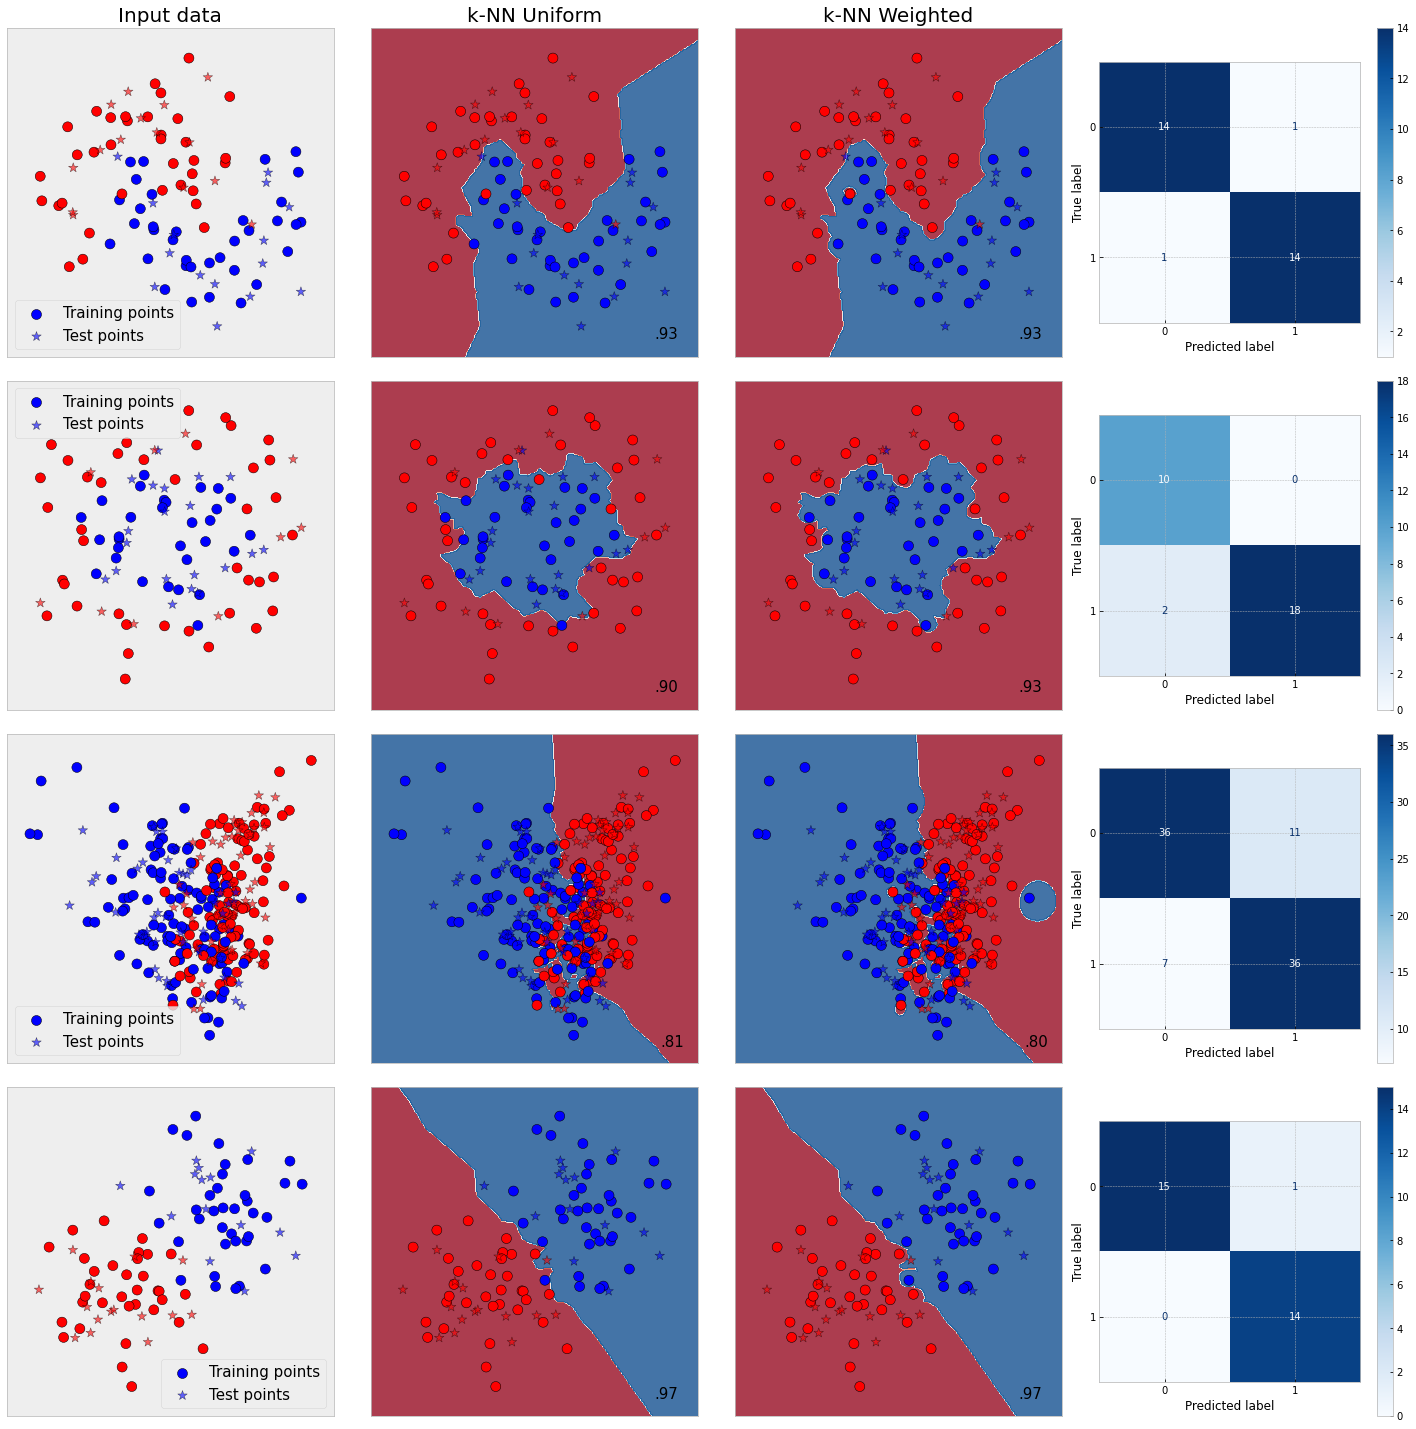

In [53]:
# Source: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification, make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix

# figure parameters
h = .02  # step size in the mesh
figure = plt.figure(figsize=(20, 20))

# set up classifiers
n_neighbors = 3
classifiers = [KNeighborsClassifier(n_neighbors, weights='uniform'), \
               KNeighborsClassifier(n_neighbors, weights='distance')]
names = ['k-NN Uniform', 'k-NN Weighted']

# Put together Data Sets
n_samples = 300
X, y = make_classification(n_samples, n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable,
            make_blobs(centers=[[-1,-1],[2,1]])]
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.3, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    if ds_cnt == 0:
        ax.set_title('Input data',size=20)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, s=100,
               edgecolors='k',label='Training points')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], marker='*', s=100, c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k',label='Test points')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.legend(fontsize=15)
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
        clf.fit(X_train, y_train)
        y_predict = clf.predict(X_test)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary
#         Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, s=100,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], marker='*', c=y_test, cmap=cm_bright, s=100,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name,size=20)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        
        i += 1
    # Confusion Matrix
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    plot_confusion_matrix(clf, X_test, y_test, ax=ax, cmap='Blues')
    i += 1    

plt.tight_layout()
plt.show()

## Bias Variance Trade-Off

tbd